<a href="https://colab.research.google.com/github/khalidpark/deeplearning_whitepaper/blob/main/deep_learning_whitepaper_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.datasets import fashion_mnist

# 데이터 불러오기
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(X_train.shape, X_test.shape)


(60000, 28, 28) (10000, 28, 28)


In [3]:
# 데이터를 정규화 합니다
X_train = X_train / 255.
X_test = X_test /255.


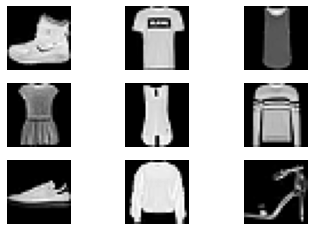

In [4]:
import matplotlib.pyplot as plt

for i in range(9):
    # subplot 정의
    plt.subplot(3, 3, i+1)
    
    # 데이터를 plot 합니다.
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.axis('off')
    
plt.show()

In [6]:
import numpy as np

# 클래스를 확인합니다.
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten


model = Sequential() 
model.add(Flatten(input_shape=(28, 28))) # 28*28 = 784 특성 벡터로 펼쳐 변환해 Dense 층으로 들어갑니다
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam'
             , loss='sparse_categorical_crossentropy'
             , metrics=['accuracy'])

model.summary()
# 총 7850 parameters (10 bias)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 모델 학습
model.fit(X_train, y_train, epochs=10, validation_data=(X_test,y_test))
# model.fit(X_train, y_train, epochs=5)


Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7751 - accuracy: 0.7389 - val_loss: 0.5075 - val_accuracy: 0.8243
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4694 - accuracy: 0.8398 - val_loss: 0.4913 - val_accuracy: 0.8296
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4424 - accuracy: 0.8486 - val_loss: 0.4667 - val_accuracy: 0.8379
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4171 - accuracy: 0.8564 - val_loss: 0.4566 - val_accuracy: 0.8419
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4100 - accuracy: 0.8589 - val_loss: 0.4525 - val_accuracy: 0.8427
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4051 - accuracy: 0.8610 - val_loss: 0.4557 - val_accuracy: 0.8439
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4018 - accuracy: 0.8629 - val_loss: 0.4713 - val_accuracy:

In [9]:
# 예측
model.predict(X_test[0:1])

array([[6.7903670e-07, 1.6927491e-08, 8.2764009e-06, 2.7445678e-06,
        8.3638715e-06, 1.4663230e-01, 4.4776032e-05, 6.8382166e-02,
        5.7438654e-03, 7.7917689e-01]], dtype=float32)

In [10]:
# 테스트 데이터 예측 정확도
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)


313/313 - 0s - loss: 0.4400 - accuracy: 0.8457
